# Exercise 3: Introduction to Dataframes

Author: Laura Gutierrez Funderburk

Created on: April 21 2018

Last modified on: April 21 2018
 
### Abstract

In this notebook I will introduce dataframes and run through a few examples. Please note this only an introductory exercise. Participants are welome to learn more about it. 

My goal in this exercise is to provide the workshop participants with a taste of what dataframes can do and to provide an opportunity to explore and learn outside this workshop. 

### About Python dataframes

Dataframes can be called via the Pandas library. Python dataframes are two-dimensional labelled data structures whose columns may or may not contain different data types. Columns and rows are indexed and can be labelled. 

Here are a few resources:

<a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python" target="_blank">DataCamp.com</a>

<a href="https://pandas.pydata.org/pandas-docs/stable/dsintro.html" target="_blank">PyData.org</a>

This is like dialling up what we have been learning so far by using comprehension lists and dictionaries, as dataframes can be thought of as dictionary-based <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html" target="_blank">numpy arrays</a> $^{[1]}$.

$^{[1]}$ A numpy array is an array that can hold different data types: float, int, str, arrays,...

### Warm up Examples

We will start by taking small arrays and defining dataframes. We will use pandas function read_csv to read from out data.csv file and, with the help of a few functions I have defined, I will showcase how powerful they can be in conjunction with dictionaries and comprehension lists when dealing with output that looks nothing like a table. 

In [1]:
# We begin by importing pandas library
import pandas as pd

In [2]:
# Let us take our celestials example along with the individuals we sent out into space
celestials = ['Moon','Sun','Neptune','Mars','Jupiter','Venus']
# Define space_travellers where each entry is a person
space_travellers = ["James","Sonia","Vero","Tom","Lily","Manny"]

In [3]:
# Define dataframes via help of our dictionary notation
space_df = pd.DataFrame({"Celestial Bodies": celestials, "Space Travellers": space_travellers})
#print(space_df)

We can also use the pandas library to read csv files and extract information as we need. For instance, by printing the data below we no longer need to refer to the original file!

We can also isolate specific columns within our file. 

In [4]:
data = pd.read_csv("./DATA/data.csv")
#print(data)

In [5]:
# Print specific columns. 
#print(data.Cluster_A)

### Dataframes and plotting our data

In the analyze.py script I have predefined a number of functions that deal with our output-.files. As the participants can notice, these are messy files, but with the help of comprehension lists, we can massage and transform into arrays we can later manipulate using dataframes. 

Below I will define a few functions and showcase how the use of dataframes made the interpretation of output results much easier. 

Let us recall. In file data.csv we are working with two clusters, Cluster_A and Cluster_B. We identified unique pairs and used those pairs as identifiers to extract information from ALL_GENE_file. After extracting appropriate information, suppose we run open source software which results in a series of output files found in the /OUTPUT_FOR_PLOTTING folder. 

Our goal is to parse, clean and plot the results found there. 

In these files, information on cluster element, size along with three scores are found. We encode these scores as Score_A, Score_B and Score_C. We are interested in plotting frequency and comparing if there is any relationship between size of cluster element and the scores we obtained. 

All scores are floating values between 0 and 1. Scores measure degree of closeness between two alignments. A score of 1 means perfect alignment while a score 0 means the alignments are completely different. 

In [6]:
# Run analyze.py script
%run -i analyze.py

In [7]:
# Indicate where to find all files of the form output-*.out
output = "./DATA/OUTPUT_FOR_PLOTTING/"
# Use glob library to store file names in array
all_the_files = glob.glob(output + "output-*.out")
print(all_the_files[0:2])

['./DATA/OUTPUT_FOR_PLOTTING/output-6279660.out', './DATA/OUTPUT_FOR_PLOTTING/output-6279657.out']


Participants are welcome to take a look at the analyze.py script. In there you will find a number of functions, most of which rely on comprehension lists. Below I will showcase use of Dataframes to manipulate tabulated data. 

In [8]:
# We define a function that takes as input a file array, as above and outputs a "dirty" dataframe
# This function takes as input an array containing all output file names
# It outputs a pair of dataframes for clusters A and B
def data_to_dataframe(file_array):
    
    """This function will turn all data stored in tables for F1,F2 into dataframes"""
    
    # Store indeces for files which are free from error
    file_index = select_index(file_array)
    
    # Turn data in F1 into dataframe, attach column names
    A_df = pd.DataFrame([extract_family_length_scores(file_array[i],1) for i in file_index],\
                      columns = ["Cluster", "Size", "Score_A", "Score_B","Score_C"])
    
    # Turn data in F2 into dataframe, attach column names
    B_df = pd.DataFrame([extract_family_length_scores(file_array[i],2) for i in file_index],\
                      columns = ["Cluster", "Size", "Score_A", "Score_B","Score_C"])
    
    # Return both datafrains as a 2-tuple
    return (A_df,B_df)


In [9]:

# This function takes as input a dataframe with either info from both clusters A and B and "cleans" it
# It removes characters such as '\n' which appear in the first and last columns, and turns all numerical values from str into float
def clean_data_frame(data_frame_pair):
    
    """This function cleans our dataframes"""
    # empty array: save cleaned dataframes
    clean_cluster_dataframes = []
    
    # Loop through both family dataframes
    for i in range(2):
        # dataframe on variable clean_Fi_df
        clean_Fi_df = data_frame_pair[i]
        # remove '/n' from columns Cline_Score and Family
        clean_Fi_df['Score_C'] = clean_Fi_df['Score_C'].map(lambda x: x.rstrip('\n'))
        clean_Fi_df['Cluster'] = clean_Fi_df['Cluster'].map(lambda x: x.rstrip('\n'))
        # Turn Cline, Q and TC scores into float (originally they are coded as strings)
        clean_Fi_df['Score_C'] = clean_Fi_df['Score_C'].apply(lambda x:float(x))
        clean_Fi_df['Score_A'] = clean_Fi_df['Score_A'].apply(lambda x:float(x))
        clean_Fi_df['Score_B'] = clean_Fi_df['Score_B'].apply(lambda x:float(x))
        clean_Fi_df['Size'] = clean_Fi_df['Size'].apply(lambda x:int(x))
        # store clean_Fi_df into array
        clean_cluster_dataframes.append(clean_Fi_df)
        
    # return array with clean versions of F1, F2
    return clean_cluster_dataframes


In [10]:
# Apply data_to_dataframe on all output files
data_pair = data_to_dataframe(all_the_files)

# Cleaning data files
clean_data_pair = clean_data_frame(data_pair)

In [15]:
# Dataframes for both clusters
ClusterB_Data_Frame = clean_data_pair[1]

Once we have parsed, tabulated and cleaned our data, it is time we take a look at it and plot it. I will select the data found on ClusterB. 

In [12]:
print(ClusterB_Data_Frame)

       Cluster  Size  Score_A  Score_B  Score_C
0   MZ22502949    16    0.950    0.798    0.842
1   MZ22526881    13    0.903    0.583    0.905
2   MZ22507135    14    0.777    0.566    0.762
3   MZ22513599    14    0.970    0.827    0.941
4   MZ22507529    15    0.950    0.831    0.947
5   MZ22509191    16    0.970    0.870    0.966
6   MZ22502612    18    0.749    0.375    0.620
7   MZ22514750    14    0.991    0.959    0.992
8   MZ22503731    15    0.988    0.947    0.988
9   MZ22518135    13    0.977    0.844    0.975
10  MZ22521381    14    0.924    0.743    0.924
11  MZ22523467    14    0.961    0.771    0.957
12  MZ22519193    13    0.978    0.877    0.978
13  MZ22503867    15    0.947    0.781    0.934
14  MZ22515097    15    0.997    0.995    0.998
15  MZ22509506    13    0.958    0.833    0.901
16  MZ22507380    17    0.791    0.423    0.770
17  MZ22515611    13    1.000    1.000    1.000
18  MZ22506271    13    0.827    0.573    0.808
19  MZ22509079    15    0.884    0.613  

We are now ready to plot the distribution of each score. 

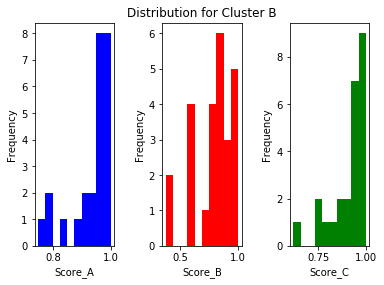

In [13]:
plot_frequency(ClusterB_Data_Frame,"B")

#### Remarks

We see similarities between Score_C and Score_A in terms of the distribution. However Score_B seems to place alignments in different ranges. 


Let us next see if we can find any interesting patterns between size of cluster element and scores. 

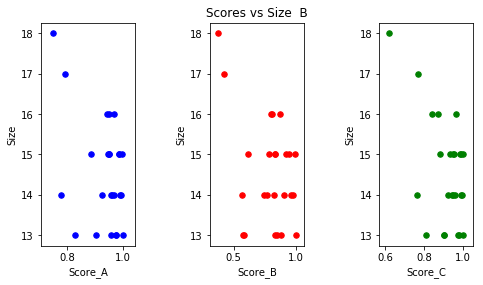

In [14]:
plot_number_seq_vs_scores(ClusterB_Data_Frame,"B")

#### Remarks

In this case, we see two cluster elements with largest size with a lower score. Although because the sample is small, we cannot make any inferences. 

### Your turn

Exercise 1)

Repeat the exercise above with ClusterA:

1) Create a clean dataframe from data for A:
Hint:  ClusterA_Data_Frame = clean_data_pair[  ]

2) Print ClusterA_Data_Frame

3) Plot frequency and plot scatterplot of size vs scores. 

Exercise 2)

Open the analyze.py script along with the output-.out files and discuss with a peer how the use of comprehension lists and dataframes made plotting results possible. 

What other kinds of information can you extract from ClusterA_Data_Frame and  ClusterB_Data_Frame?